# **model.save()** (Save Entire Model):
This method saves the entire model, including the architecture, optimizer, and weights. It creates a file in the Hierarchical Data Format (HDF5) with a .h5 extension. This allows you to save and load the entire model, making it convenient for sharing, deployment, or further training.

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
# Generate sample data
import numpy as np
num_samples=1000
input_dim=5
x_train=np.random.random((num_samples, input_dim))
y_train=np.random.randint(2,size=(num_samples,1))


In [6]:
# Check datatype of data
type(x_train),type(y_train)

(numpy.ndarray, numpy.ndarray)

In [7]:
x_train

array([[0.0330478 , 0.15367565, 0.24446459, 0.53668631, 0.6686473 ],
       [0.39349904, 0.60382803, 0.92970862, 0.54873857, 0.32515505],
       [0.30602779, 0.37033228, 0.93915603, 0.79988481, 0.8082729 ],
       ...,
       [0.31013357, 0.12116084, 0.8486627 , 0.10925552, 0.91377469],
       [0.92740548, 0.96572847, 0.92784116, 0.9097868 , 0.30436225],
       [0.42432713, 0.7677593 , 0.5983476 , 0.6751047 , 0.11901438]])

In [8]:
y_train[:10]

array([[0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0]])

In [9]:
# Check shape of data
x_train.shape, y_train.shape

((1000, 5), (1000, 1))

In [10]:
# Create a simple ANN
model=Sequential()
model.add(Dense(10,input_dim=5, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 71 (284.00 Byte)
Trainable params: 71 (284.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


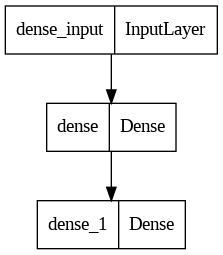

In [11]:
# Visualize the Model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# Generate validation data
x_val=np.random.random((50,5))
y_val=np.random.randint(2,size=(50,1))

In [14]:
hist=model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
32/32 [==============================] - 1s 9ms/step - loss: 0.6981 - accuracy: 0.5220 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6954 - accuracy: 0.5280 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.5270 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5270 - val_loss: 0.6924 - val_accuracy: 0.5200
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5320 - val_loss: 0.6937 - val_accuracy: 0.5200
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5410 - val_loss: 0.6953 - val_accuracy: 0.5200
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5400 - val_loss: 0.6959 - val_accuracy: 0.5200
Epoch 8/10
32/32 [==

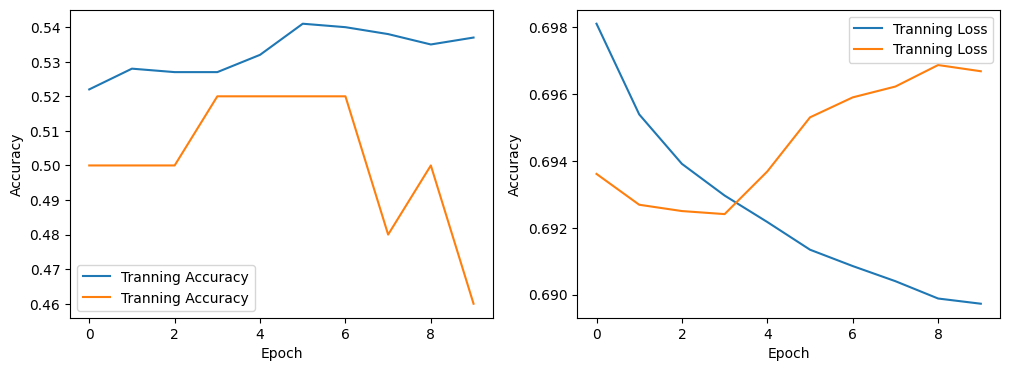

In [15]:
# Plot Accuracy and Error for Tranning and  validation data
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'],label='Tranning Accuracy')
plt.plot(hist.history['val_accuracy'],label='Tranning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['loss'],label='Tranning Loss')
plt.plot(hist.history['val_loss'],label='Tranning Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [16]:
# Test on random data
x_test=np.random.random((50,5))
model.predict(x_test)

2/2 [==============================] - 0s 6ms/step


array([[0.48932746],
       [0.4697573 ],
       [0.46784464],
       [0.47287762],
       [0.5006721 ],
       [0.4887241 ],
       [0.5071489 ],
       [0.50780755],
       [0.48921484],
       [0.5169466 ],
       [0.4740809 ],
       [0.4939333 ],
       [0.4649579 ],
       [0.5181212 ],
       [0.51413095],
       [0.474471  ],
       [0.50965667],
       [0.46717545],
       [0.5020729 ],
       [0.4589473 ],
       [0.48522016],
       [0.5051149 ],
       [0.48079744],
       [0.48257133],
       [0.47057644],
       [0.49381968],
       [0.49037006],
       [0.46677795],
       [0.47858542],
       [0.50740933],
       [0.47641778],
       [0.4643866 ],
       [0.48136303],
       [0.48952207],
       [0.48914573],
       [0.48617113],
       [0.49916083],
       [0.46642226],
       [0.45602342],
       [0.45862526],
       [0.51685524],
       [0.48920438],
       [0.4856219 ],
       [0.4684783 ],
       [0.4942947 ],
       [0.45747432],
       [0.4781044 ],
       [0.465

In [18]:
# Save whole model that includes weights and architecture
model.save('/content/drive/MyDrive/model_n_weights/example/model_ex1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
# load model
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/model_n_weights/example/model_ex1.h5')

In [29]:
# Predict on loaded model
y_pred=loaded_model.predict(x_test)

2/2 [==============================] - 0s 8ms/step


In [30]:
# Print weights and bias for each layers
for layer in model.layers:
    print(f"Layer: {layer.name}")
    weights, biases = layer.get_weights()
    print("Weights:")
    print(weights)
    print("Biases:")
    print(biases)
    print("=" * 30)

Layer: dense
Weights:
[[ 0.5840994   0.16825321 -0.06402262 -0.18700191 -0.6238853  -0.18879253
  -0.4297858   0.12234668  0.54495215  0.10307391]
 [-0.14714137  0.21897136 -0.25228325 -0.62718844  0.21162744 -0.43468153
  -0.5105411  -0.4959606   0.36430362  0.08162904]
 [-0.1304634   0.5899118   0.5050341  -0.31268436  0.09194766 -0.33505365
   0.66083646  0.2782284  -0.441547   -0.21527626]
 [ 0.33794013 -0.14271668 -0.32676005 -0.04043788 -0.4525769   0.15725726
  -0.2578143  -0.14928235  0.32963908 -0.3783419 ]
 [-0.17359887 -0.2589552   0.16784392 -0.36778995  0.30849612 -0.56717557
  -0.12724112  0.11353503  0.00629526  0.5274218 ]]
Biases:
[-0.03214277 -0.02748662 -0.0657918   0.          0.0019766   0.
  0.02970973  0.07847723  0.02085055  0.03963086]
Layer: dense_1
Weights:
[[-0.44855824]
 [ 0.028108  ]
 [-0.6180148 ]
 [ 0.5827711 ]
 [-0.3321477 ]
 [-0.55468345]
 [ 0.12907575]
 [ 0.6090657 ]
 [ 0.11090598]
 [-0.37887383]]
Biases:
[0.03145896]


## **model.save_weights()** (Save Only Weights):
This method saves only the weights of the model, without the architecture or optimizer state. It also creates an HDF5 file but specifically for weights. This is useful when you want to save and load pre-trained weights into a model with the same architecture.

 Saving the entire model is convenient but may result in larger file sizes.
 Saving only weights is more lightweight and faster but requires having the model architecture available separately.
 Make sure the architecture of the model when loading weights matches the architecture when the weights were saved.

In [24]:
# Save model weight only
model.save_weights('/content/drive/MyDrive/model_n_weights/example/model_ex1_weights.h5')

In [22]:
# we need model for those weights
new_model=model

In [23]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 71 (284.00 Byte)
Trainable params: 71 (284.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# Loading weihgts
new_model.load_weights('/content/drive/MyDrive/model_n_weights/example/model_ex1_weights.h5')

In [38]:
# Generate validation data
x_val=np.random.random((50,5))
y_val=np.random.randint(2,size=(50,1))

In [39]:
# Predicting on loaded weihgt model
y_pred = (model.predict(x_val) > 0.5).astype(int)


2/2 [==============================] - 0s 13ms/step


In [40]:
y_val, y_pred

(array([[1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0]]),
 array([[0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0

In [32]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

In [41]:
# Calculate metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

In [42]:
# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.62
Precision: 0.5
Confusion Matrix:
[[28  3]
 [16  3]]


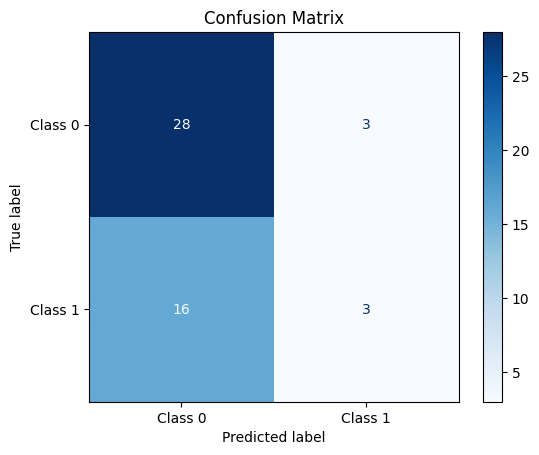

In [43]:
# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()